In [8]:
from pathlib import Path
from ast import literal_eval
from collections import Counter
import pickle
from typing import Tuple
from matplotlib import pyplot

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import tqdm

In [13]:
final =[]
for i in range (0, 5):
    for set_ in ["train"]:
        X = pickle.load(open(f"C:/Users/benna/Documents/adn_circulant/data/for_training/X_{set_}_{i}.pkl", 'rb'))
        y = pickle.load(open(f"C:/Users/benna/Documents/adn_circulant/data/for_training/y_{set_}_{i}.pkl",'rb'))
        model = XGBClassifier(tree_method="hist")
        model.fit(X, y)
        # extract the feature importances
        thresholds = np.sort(model.feature_importances_)
        first_not_nul = [i for i in thresholds if i != 0][0]
        # select features using threshold
        selection = SelectFromModel(model,threshold=first_not_nul, prefit=True)
        feature_idx = selection.get_support()
        feature_name = X.columns[feature_idx]
        print(len(feature_name))
        final =list(set(feature_name) | set(final))

140
141
136
132
139


In [14]:
len(final)

520

# Modèle après feature selection

In [50]:
def cross_val(xgb):
    acc_cv = []
    for i in range (0,5):
        X_test = pickle.load(open(f"C:/Users/benna/Documents/adn_circulant/data/for_training/X_test_{i}.pkl", 'rb'))
        y_test = pickle.load(open(f"C:/Users/benna/Documents/adn_circulant/data/for_training/y_test_{i}.pkl",'rb'))
        X_train = pickle.load(open(f"C:/Users/benna/Documents/adn_circulant/data/for_training/X_train_{i}.pkl", 'rb'))
        y_train = pickle.load(open(f"C:/Users/benna/Documents/adn_circulant/data/for_training/y_train_{i}.pkl",'rb'))
        #---------- feature selection 
        model = XGBClassifier(tree_method="hist")
        model.fit(X_train, y_train)
        # extract the feature importances
        thresholds = np.sort(model.feature_importances_)
        first_not_nul = [i for i in thresholds if i != 0][0]
        # select features using threshold
        selection = SelectFromModel(model,threshold=first_not_nul, prefit=True)
        feature_idx = selection.get_support()
        feature_name = X_train.columns[feature_idx]
        print (f"selected feature: {len(feature_name)}")
        X_train_selected = X_train[feature_name]
        X_test_selected = X_test[feature_name]
        xgb.fit(X_train_selected, y_train)
            
        y_pred = xgb.predict(X_train_selected)
        print(f'Accuracy on train : {round(100 * accuracy_score(y_pred, y_train))} % for set {i}')
            
        y_pred = xgb.predict(X_test_selected)
        print(f'Accuracy on test : {round(100 * accuracy_score(y_pred, y_test))} % for set {i}')
        acc_cv.append(accuracy_score(y_pred, y_test))
    return np.mean(acc_cv), acc_cv

In [51]:
xgb = XGBClassifier(tree_method = "hist")
cross_val(xgb)

selected feature: 140
Accuracy on train : 100.0 % for set 0
Accuracy on test : 65.0 % for set 0
selected feature: 141
Accuracy on train : 100.0 % for set 1
Accuracy on test : 59.0 % for set 1
selected feature: 136
Accuracy on train : 100.0 % for set 2
Accuracy on test : 65.0 % for set 2
selected feature: 132
Accuracy on train : 100.0 % for set 3
Accuracy on test : 41.0 % for set 3
selected feature: 139
Accuracy on train : 100.0 % for set 4
Accuracy on test : 67.0 % for set 4


(0.5921568627450979,
 [0.6470588235294118,
  0.5882352941176471,
  0.6470588235294118,
  0.4117647058823529,
  0.6666666666666666])

In [19]:
rf = RandomForestClassifier(n_estimators=1000)
cross_val(rf)

selected feature: 140
Accuracy on train : 100.0 % for set 0
Accuracy on test : 59.0 % for set 0
selected feature: 141
Accuracy on train : 100.0 % for set 1
Accuracy on test : 62.0 % for set 1
selected feature: 136
Accuracy on train : 100.0 % for set 2
Accuracy on test : 62.0 % for set 2
selected feature: 132
Accuracy on train : 100.0 % for set 3
Accuracy on test : 62.0 % for set 3
selected feature: 139
Accuracy on train : 100.0 % for set 4
Accuracy on test : 70.0 % for set 4


(0.6276292335115865,
 [0.5882352941176471,
  0.6176470588235294,
  0.6176470588235294,
  0.6176470588235294,
  0.696969696969697])

In [20]:
lr = LogisticRegression(class_weight='balanced', C=2)
cross_val(lr)

selected feature: 140
Accuracy on train : 94.0 % for set 0
Accuracy on test : 62.0 % for set 0
selected feature: 141
Accuracy on train : 94.0 % for set 1
Accuracy on test : 56.0 % for set 1
selected feature: 136
Accuracy on train : 96.0 % for set 2
Accuracy on test : 68.0 % for set 2
selected feature: 132
Accuracy on train : 96.0 % for set 3
Accuracy on test : 65.0 % for set 3
selected feature: 139
Accuracy on train : 92.0 % for set 4
Accuracy on test : 64.0 % for set 4


(0.6272727272727272,
 [0.6176470588235294,
  0.5588235294117647,
  0.6764705882352942,
  0.6470588235294118,
  0.6363636363636364])

# intersection des features 

In [21]:
final =[]
for i in range (0, 5):
    for set_ in ["train"]:
        X = pickle.load(open(f"C:/Users/benna/Documents/adn_circulant/data/for_training/X_{set_}_{i}.pkl", 'rb'))
        y = pickle.load(open(f"C:/Users/benna/Documents/adn_circulant/data/for_training/y_{set_}_{i}.pkl",'rb'))
        model = XGBClassifier(tree_method="hist")
        model.fit(X, y)
        # extract the feature importances
        thresholds = np.sort(model.feature_importances_)
        first_not_nul = [i for i in thresholds if i != 0][0]
        # select features using threshold
        selection = SelectFromModel(model,threshold=first_not_nul, prefit=True)
        feature_idx = selection.get_support()
        feature_name = X.columns[feature_idx]
        print(len(feature_name))
        final =list(set(feature_name) & set(final))
print (len(final))

140
141
136
132
139
0


# union

In [57]:
final =[]
for i in range (0, 5):
    for set_ in ["train"]:
        X = pickle.load(open(f"C:/Users/benna/Documents/adn_circulant/data/for_training/X_{set_}_{i}.pkl", 'rb'))
        y = pickle.load(open(f"C:/Users/benna/Documents/adn_circulant/data/for_training/y_{set_}_{i}.pkl",'rb'))
        model = XGBClassifier(tree_method="hist")
        model.fit(X, y)
        # extract the feature importances
        thresholds = np.sort(model.feature_importances_)
        first_not_nul = [i for i in thresholds if i != 0][0]
        # select features using threshold
        selection = SelectFromModel(model,threshold=first_not_nul, prefit=True)
        feature_idx = selection.get_support()
        feature_name = X.columns[feature_idx]
        print(len(feature_name))
        final =list(set(feature_name) | set(final))
print (len(final))

140
141
136
132
139
520


In [59]:
acc_cv = []
for i in range (0,5):
    X_test = pickle.load(open(f"C:/Users/benna/Documents/adn_circulant/data/for_training/X_test_{i}.pkl", 'rb'))
    y_test = pickle.load(open(f"C:/Users/benna/Documents/adn_circulant/data/for_training/y_test_{i}.pkl",'rb'))
    X_train = pickle.load(open(f"C:/Users/benna/Documents/adn_circulant/data/for_training/X_train_{i}.pkl", 'rb'))
    y_train = pickle.load(open(f"C:/Users/benna/Documents/adn_circulant/data/for_training/y_train_{i}.pkl",'rb'))

    X_train_selected = X_train[final]
    X_test_selected = X_test[final]
    xgb = XGBClassifier(tree_method = "hist")
    xgb.fit(X_train_selected, y_train)
        
    y_pred = xgb.predict(X_train_selected)
    print(f'Accuracy on train : {round(100 * accuracy_score(y_pred, y_train))} % for set {i}')
        
    y_pred = xgb.predict(X_test_selected)
    print(f'Accuracy on test : {round(100 * accuracy_score(y_pred, y_test))} % for set {i}')
    acc_cv.append(accuracy_score(y_pred, y_test))
print(np.mean(acc_cv), acc_cv)

Accuracy on train : 100.0 % for set 0
Accuracy on test : 59.0 % for set 0
Accuracy on train : 100.0 % for set 1
Accuracy on test : 56.0 % for set 1
Accuracy on train : 100.0 % for set 2
Accuracy on test : 62.0 % for set 2
Accuracy on train : 100.0 % for set 3
Accuracy on test : 47.0 % for set 3
Accuracy on train : 100.0 % for set 4
Accuracy on test : 70.0 % for set 4
0.5864527629233512 [0.5882352941176471, 0.5588235294117647, 0.6176470588235294, 0.47058823529411764, 0.696969696969697]


# train/ validation

100%|██████████| 118/118 [00:17<00:00,  6.87it/s]


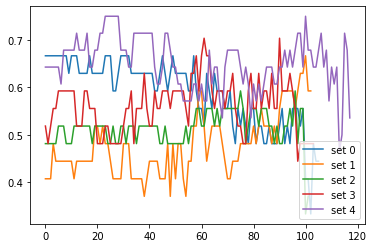

In [11]:
set_ = "train"
test_size = 0.2
seed = 42
from sklearn.model_selection import train_test_split
from tqdm import tqdm
for i in range(0,5):
    X = pickle.load(open(f"C:/Users/benna/Documents/adn_circulant/data/for_training/X_{set_}_{i}.pkl", 'rb'))
    y = pickle.load(open(f"C:/Users/benna/Documents/adn_circulant/data/for_training/y_{set_}_{i}.pkl",'rb'))
    X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=test_size, stratify=y, random_state=seed)
    validate_acc = []
    #---------- feature selection 
    model = XGBClassifier(tree_method="hist")
    model.fit(X_train, y_train)
    # extract the feature importances
    thresholds = np.sort(model.feature_importances_)
    len_selected = len([i for i in thresholds if i != 0])

    for it in tqdm(range (0,len_selected)):
        
        first_not_nul = [i for i in thresholds if i != 0][it]
        # select features using threshold
        selection = SelectFromModel(model,threshold=first_not_nul, prefit=True)
        feature_idx = selection.get_support()
        feature_name = X_train.columns[feature_idx]
        X_train_selected = X_train[feature_name]
        X_test_selected = X_validate[feature_name]
        xgb = XGBClassifier(tree_method = "hist")
        xgb.fit(X_train_selected, y_train)
            
        y_pred = xgb.predict(X_test_selected)
        validate_acc.append(accuracy_score(y_pred, y_validate))
    pyplot.plot([i for i in range(0,len_selected)], validate_acc, label = f"set {i}")
pyplot.legend()